#İş Problemi (Business Problem)

Elle yazılan rakamları bilgisayarın anlayacağı hale çevirmek
için kullanılan bir veri setidir MNist.

Bu iş:

*   Gerekli devlet kurumlarında
*   Günlük yaşantımızda
*   Okul hayatımızda
*   Benzeri birçok durumda işe yarayabilir.

Translating handwritten numbers into computer understandable
MNist is a dataset used for

This job:

* In required government agencies
* In our daily life
* In our school life
* It can work in many similar situations.

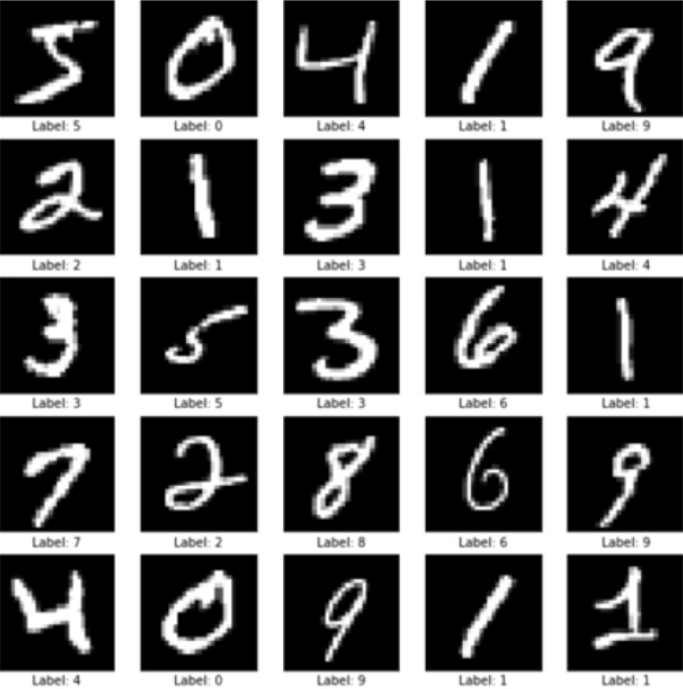

#Veriyi Anlamak(Data Understanding)

In [29]:
#Gerekli Makine öğrenmesi kütüphaneleri aktarılıyor.
#Required Machine learning libraries are imported.
import tensorflow as tf
import pickle
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from keras.layers import Conv2D, MaxPooling2D

#Veri görselleştirme ve analizinde kullanılacak kütüphaneler aktarılıyor.
#The necessary libraries for data analysis and visualization are imported.
import matplotlib.pyplot as plt
import numpy as np

#Çıkabilecek bazı uyarıları görmezden gelmek için.
#To ignore some of the warnings that might come up.
import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)
filterwarnings('ignore')

In [30]:
(x_train,y_train),(x_test,y_test) =mnist.load_data()

In [31]:
print("Egitim Seti Boyutu(Training Set Size):",x_train.shape,y_train.shape)

Egitim Seti Boyutu(Training Set Size): (60000, 28, 28) (60000,)


In [32]:
print("Test Seti Boyutu(Test Set Size):",x_test.shape,y_test.shape)

Test Seti Boyutu(Test Set Size): (10000, 28, 28) (10000,)


In [33]:
len(np.unique(y_train))

10

In [34]:
num_labels=len(np.unique(y_train))

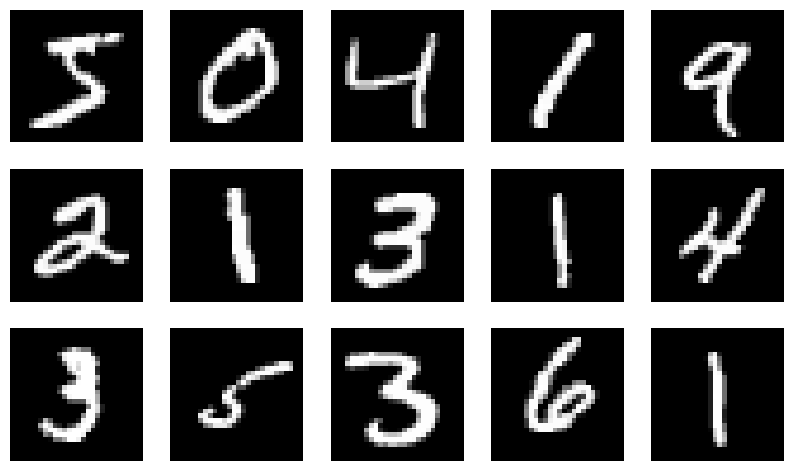

In [35]:
def visualize_img(data,n):
  plt.figure(figsize=(10,10))
  for n in range(n):
    ax=plt.subplot(5,5,n+1)
    plt.imshow(data[n],cmap="gray")
    plt.axis("off")
visualize_img(x_train,15)

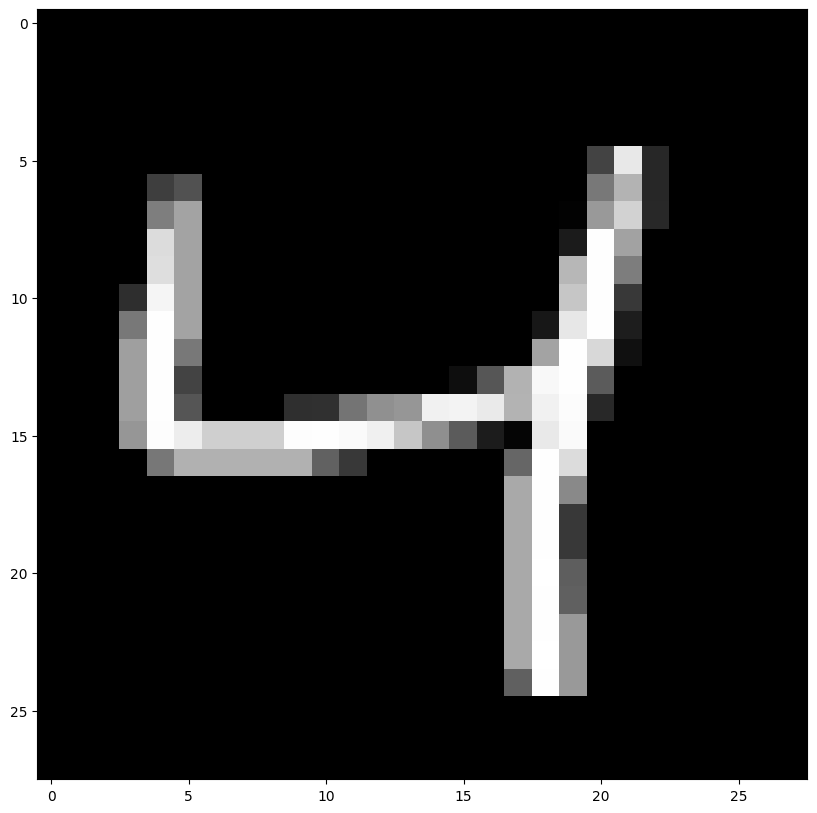

In [36]:
plt.figure(figsize=(10,10))
plt.imshow(x_train[2],cmap="gray");

In [37]:
x_train[2].shape

(28, 28)

In [38]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

In [39]:
x_train[2][10,10]

0

In [40]:
x_train[2][14,10]

49

In [41]:
x_train[2].mean()

24.799744897959183

In [42]:
x_train[2].sum()

19443

In [43]:
x_train[2][14:20,10:20].mean()

96.51666666666667

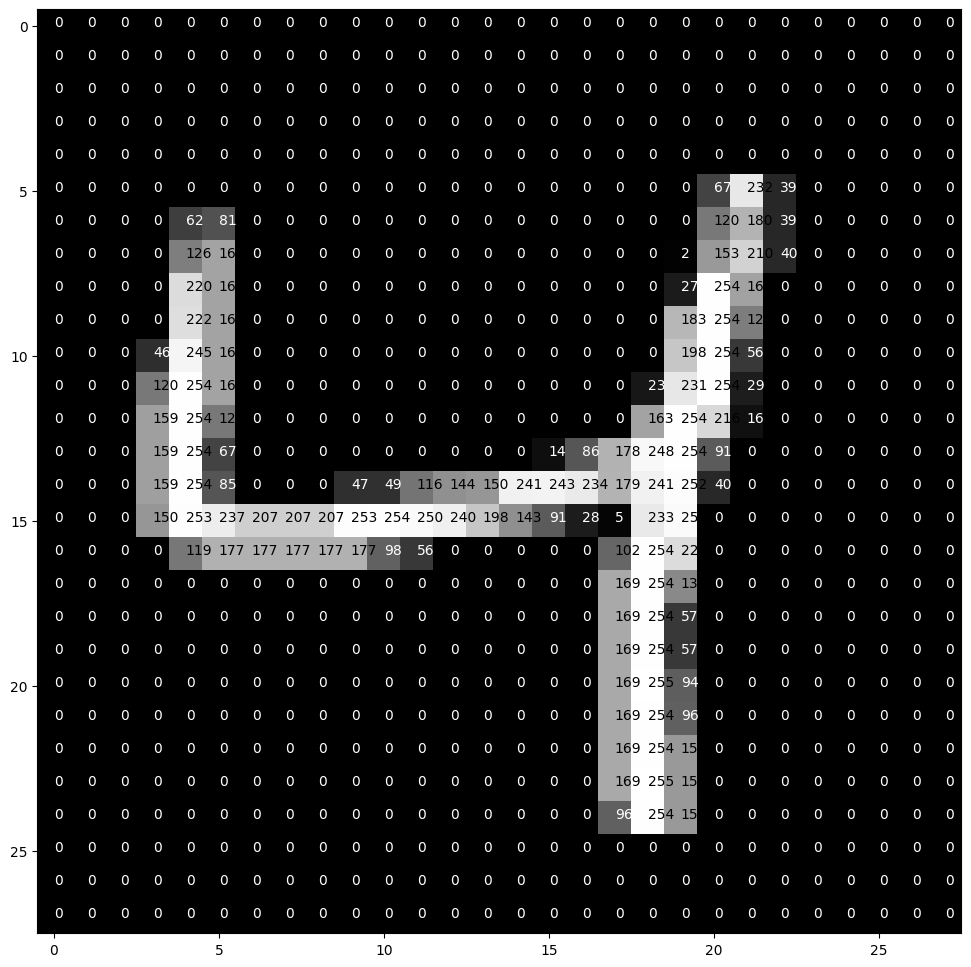

In [44]:
def pixel_visualize(img):
  fig = plt.figure(figsize=(12,12))
  ax=fig.add_subplot(111)
  ax.imshow(img,cmap="gray")
  width,height = img.shape

  threshold=img.max()/2.5

  for x in range(width):
    for y in range(height):
      ax.annotate(str(round(img[x,y],2)),xy=(y,x),
                  color="white" if img[x][y]<threshold else "black")
pixel_visualize(x_train[2])

#Veriyi Hazırlamak(Data Preparation)

##Encoding

    * Önce: [0 1 2 3 4 5 6 7 8 9]
    * Sonra:[0 0 1 0 0 0 0 0 0 0]
    Yani 2 sayısına karşılık geliyor.

In [45]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [46]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [47]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

##Reshaping

In [48]:
image_size = x_train.shape[1]

In [49]:
image_size

28

In [50]:
print(f"x_train boyutu: {x_train.shape}")
print(f"x_test boyutu: {x_test.shape}")

x_train boyutu: (60000, 28, 28)
x_test boyutu: (10000, 28, 28)


In [51]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

print(f"x_train boyutu:{x_train.shape}")
print(f"x_test boyutu: {x_test.shape}")

x_train boyutu:(60000, 28, 28, 1)
x_test boyutu: (10000, 28, 28, 1)


##Standardization

In [52]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

#Modelleme(Modeling)

In [53]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  
    Dense(10, activation='softmax')
])


model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),"accuracy"])


In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 1, 1, 128)        

In [55]:
history=model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test));

Epoch 1/10


469/469 [==============================] - 33s 68ms/step - loss: 0.3849 - precision_1: 0.9398 - recall_1: 0.8359 - accuracy: 0.8805 - val_loss: 0.1023 - val_precision_1: 0.9749 - val_recall_1: 0.9637 - val_accuracy: 0.9693
Epoch 2/10
469/469 [==============================] - 31s 65ms/step - loss: 0.1249 - precision_1: 0.9711 - recall_1: 0.9572 - accuracy: 0.9639 - val_loss: 0.0740 - val_precision_1: 0.9825 - val_recall_1: 0.9763 - val_accuracy: 0.9792
Epoch 3/10
469/469 [==============================] - 35s 75ms/step - loss: 0.0917 - precision_1: 0.9781 - recall_1: 0.9686 - accuracy: 0.9735 - val_loss: 0.0688 - val_precision_1: 0.9847 - val_recall_1: 0.9776 - val_accuracy: 0.9811
Epoch 4/10
469/469 [==============================] - 33s 70ms/step - loss: 0.0728 - precision_1: 0.9821 - recall_1: 0.9759 - accuracy: 0.9789 - val_loss: 0.0599 - val_precision_1: 0.9847 - val_recall_1: 0.9815 - val_accuracy: 0.9828
Epoch 5/10
469/469 [==============================] - 33s 71ms/step - loss:

#Değerlendirme(Evaluation)

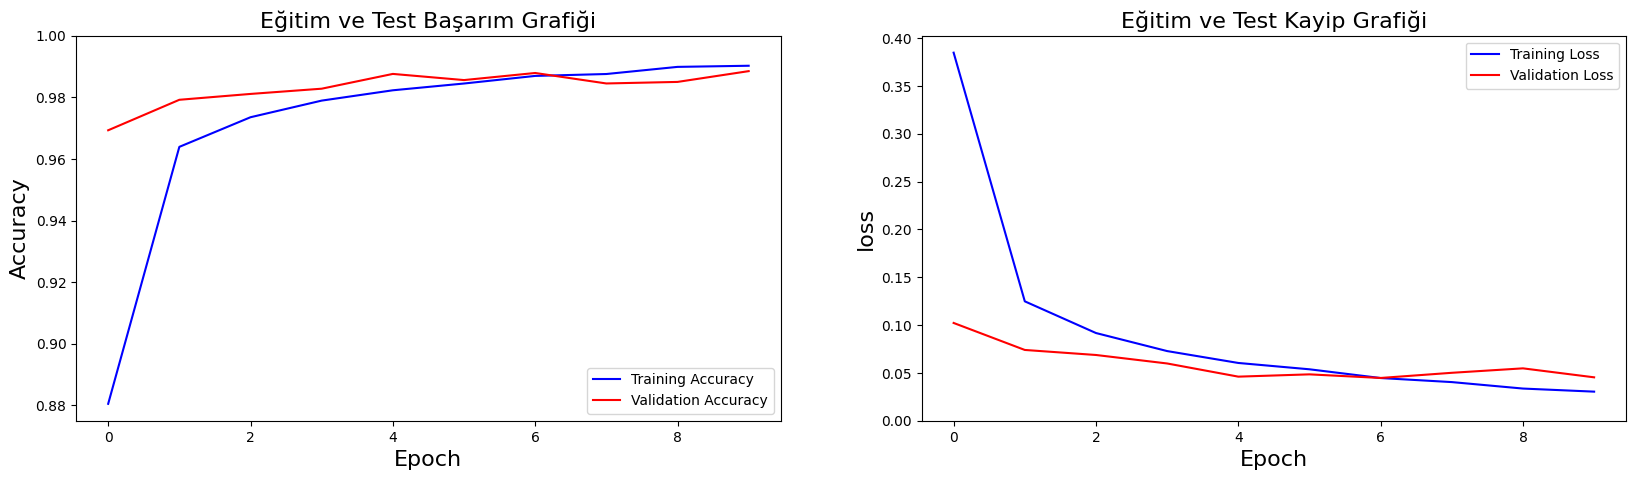

In [57]:

plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('Eğitim ve Test Başarım Grafiği', fontsize=16)


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('loss', fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title('Eğitim ve Test Kayip Grafiği', fontsize=16)
plt.show()

In [58]:
loss,precision,recall,acc = model.evaluate(x_test,y_test,verbose=False)
print("\nTest Accuracy:%.1f%%"%(100.0*acc))
print("\nTest Loss:%.1f%%"%(100.0*loss))
print("\nTest Precision:%.1f%%"%(100.0*precision))
print("\nTest Recall:%.1f%%"%(100.0*recall))


Test Accuracy:98.8%

Test Loss:4.5%

Test Precision:98.9%

Test Recall:98.8%


#Modelin Kaydedilmesi ve Tahmin için Kullanılması (Saving the Model and Using it for Prediction)

In [59]:
model.save("rakam_tanima_(digit_recognition).h5")